In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
store = pd.read_csv("store.csv")
df = pd.read_csv("train.csv", low_memory=False)

In [3]:
print('sample store data')
store.head()

sample store data


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
print('sample sales data')
df.head()

sample sales data


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
print ("training data", df.shape)
print ("Stores data", store.shape)

training data (1017209, 9)
Stores data (1115, 10)


### Data Merge

In [6]:
df = pd.merge(df, store, on='Store') #merge data for analysis
print ("List of columns -", df.columns)
df['Open'] = df['Open'].apply(lambda x: 0 if np.isnan(x) else x) #get rid of NaN values if store is 'closed'

List of columns - Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


### Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [8]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [9]:
df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [10]:
#Date time exploration of the data set to add additonal features interms of Day, Month, Year, MonthYear
def date_change(df):
    df['Month'] = df['Date'].apply(lambda x : int(str(x)[5:7]))
    df['Year'] = df['Date'].apply(lambda x : int(str(x)[:4]))
    df['MonthYear'] =df['Date'].apply(lambda x : (str(x)[:7]))
    df['date_int'] = df['Date'].apply(lambda x : (str(x)[8:10]))
    df['date_int'] = df['date_int'].astype(str).astype(int)
    df = df.drop('Date', axis=1)
    return df
df_1 = date_change(df)

### Data Visualization 

<Axes: >

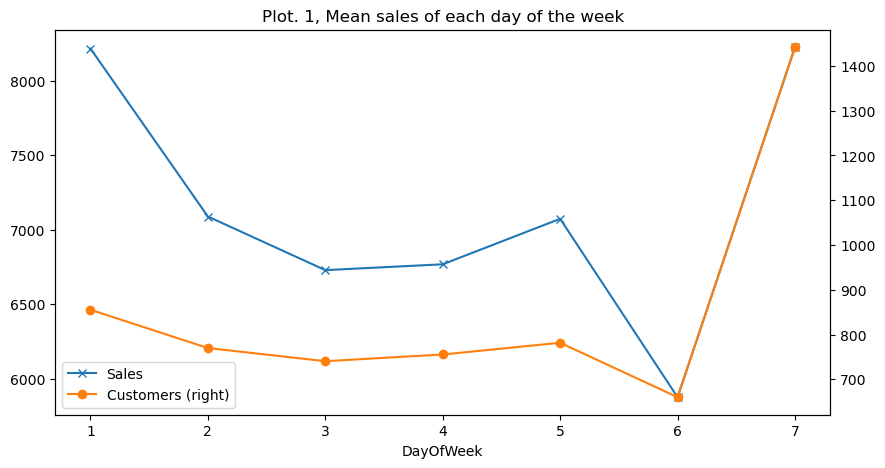

In [11]:
#weekly sales with customer intreaction Mean
day = df_1[(df_1['Open']!=0)]
sales_per_day = day.groupby('DayOfWeek')['Sales'].mean()
cust_per_day = day.groupby('DayOfWeek')['Customers'].mean()
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
ax1 = sales_per_day.plot(legend=True, ax=axis1, marker='x',title="Plot. 1, Mean sales of each day of the week")
ax1.set_xticks(sales_per_day.index)
tmp = ax1.set_xticklabels(sales_per_day.index.tolist(), rotation=90)
cust_per_day.plot(legend=True, ax=axis1, marker='o', secondary_y=True)

<Axes: >

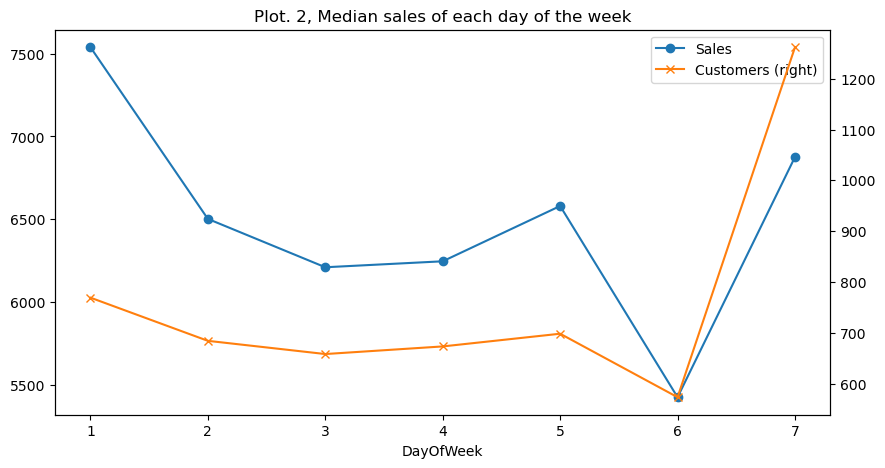

In [12]:
#weekly sales with customer intreaction Median
day = df_1[(df_1['Open']!=0)]
sales_per_day = day.groupby('DayOfWeek')['Sales'].median()
cust_per_day = day.groupby('DayOfWeek')['Customers'].median()
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
ax1 = sales_per_day.plot(legend=True, ax=axis1, marker='o',title="Plot. 2, Median sales of each day of the week")
ax1.set_xticks(sales_per_day.index)
tmp = ax1.set_xticklabels(sales_per_day.index.tolist(), rotation=90)
cust_per_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

<Axes: >

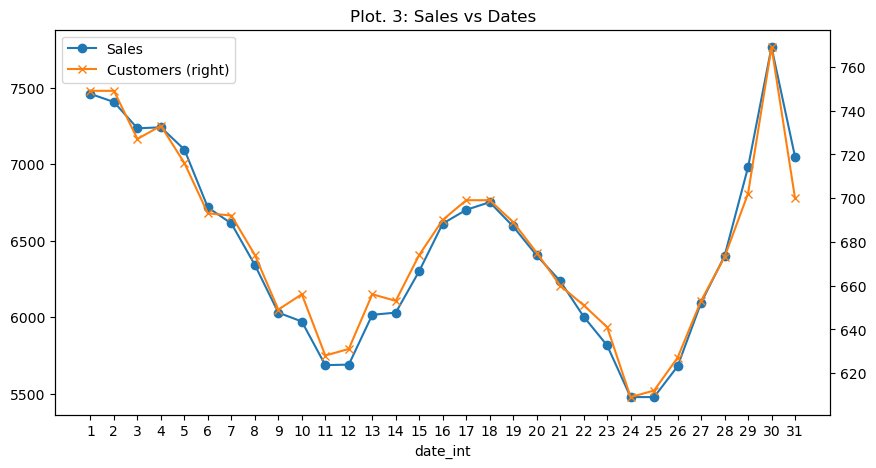

In [13]:
#Daily sales with customer interaction
day = df_1[(df_1['Open']!=0)]
sales_per_day = day.groupby('date_int')['Sales'].median()
cust_per_day = day.groupby('date_int')['Customers'].median()
fig, (axis1) = plt.subplots(1,1, sharex=True, figsize=(10,5))
ax1 = sales_per_day.plot(legend=True, ax=axis1, marker='o',title="Plot. 3: Sales vs Dates")
ax1.set_xticks(sales_per_day.index)
tmp = ax1.set_xticklabels(sales_per_day.index.tolist(), rotation=90)
cust_per_day.plot(legend=True, ax=axis1, marker='x', secondary_y=True)

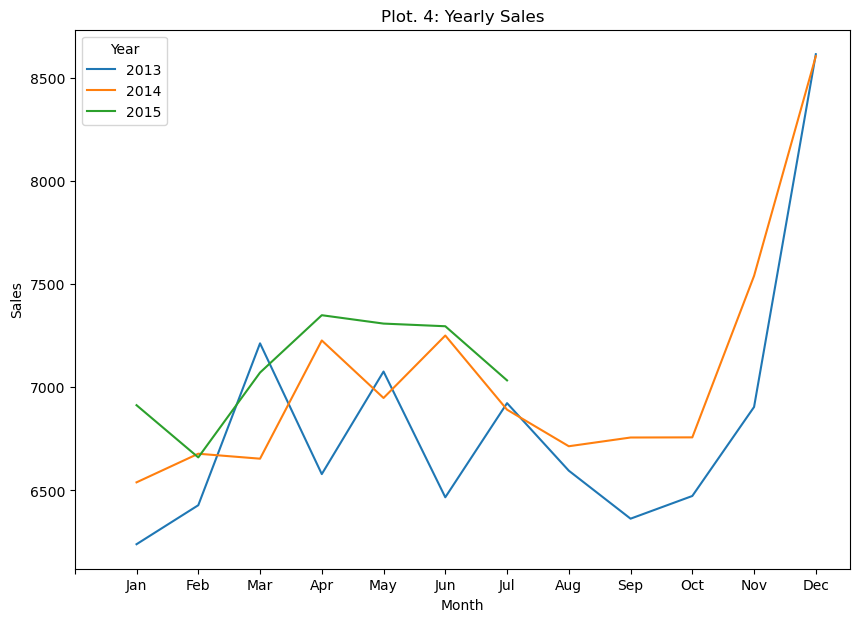

In [14]:
#Monthly sales over the years and movementum
subs = df_1[df_1['Open']!=0]
selected_sales = subs.groupby(['Year', 'Month'])['Sales'].mean()
selected_cust = subs.groupby(['Year', 'Month'])['Customers'].mean()
fig, (axis1) = plt.subplots(1,1, figsize=(10,7))
selected_sales.unstack().T.plot(ax=axis1)
tmp = axis1.set_title("Plot. 4: Yearly Sales")
tmp = axis1.set_ylabel("Sales")
tmp = axis1.set_xticks(range(0,13))
tmp = axis1.set_xticklabels(calendar.month_abbr)

<Axes: >

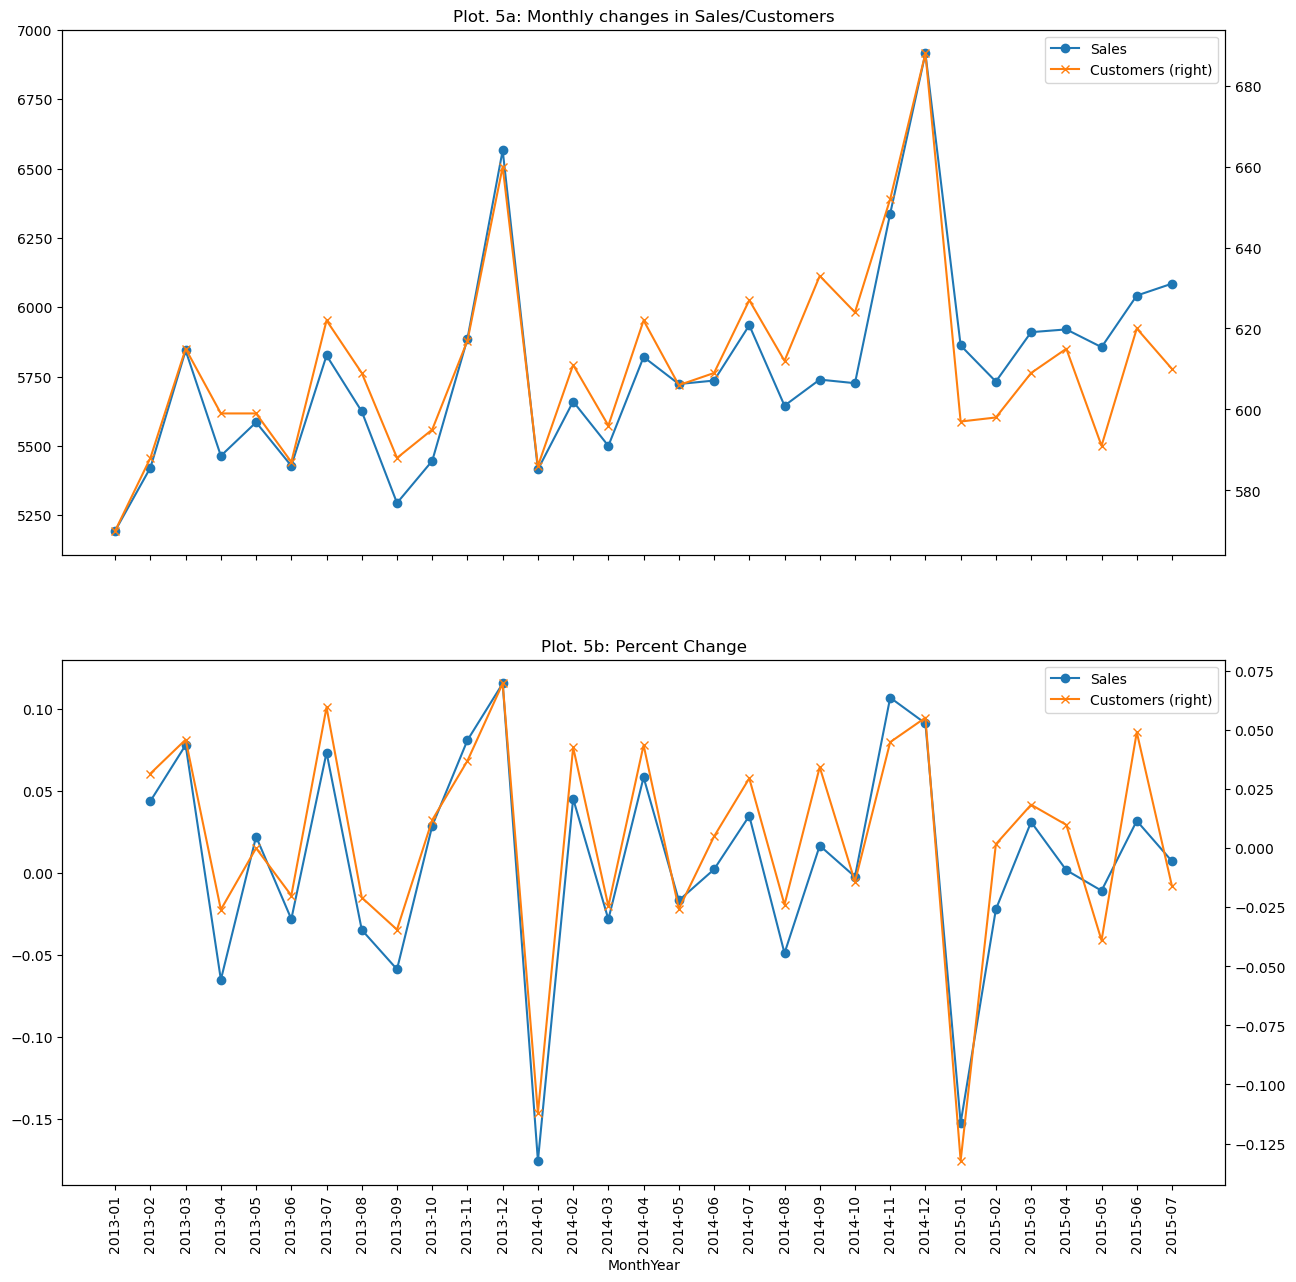

In [15]:
#Monthly sales with customer interaction in absolute numbers(%)
median_sales = df_1.groupby('MonthYear')['Sales'].median()
pct_median_change = df_1.groupby('MonthYear')['Sales'].median().pct_change()
median_cust = df_1.groupby('MonthYear')['Customers'].median()
pct_median_custchange = df_1.groupby('MonthYear')['Customers'].median().pct_change()
fig, (axis1, axis2) = plt.subplots(2, 1, sharex=True, figsize=(15,15))
ax1 = median_sales.plot(legend=True, ax=axis1, marker='o',title="Plot. 5a: Monthly changes in Sales/Customers")
ax1.set_xticks(range(len(median_sales)))
ax1.set_xticklabels(median_sales.index.tolist(), rotation=90)
ax2 = pct_median_change.plot(legend=True, ax=axis2, marker='o',rot=90, title="Plot. 5b: Percent Change")
median_cust.plot(legend=True, ax=axis1, marker='x', secondary_y=True)
pct_median_custchange.plot(legend=True, ax=axis2, marker='x', rot=90, secondary_y=True)

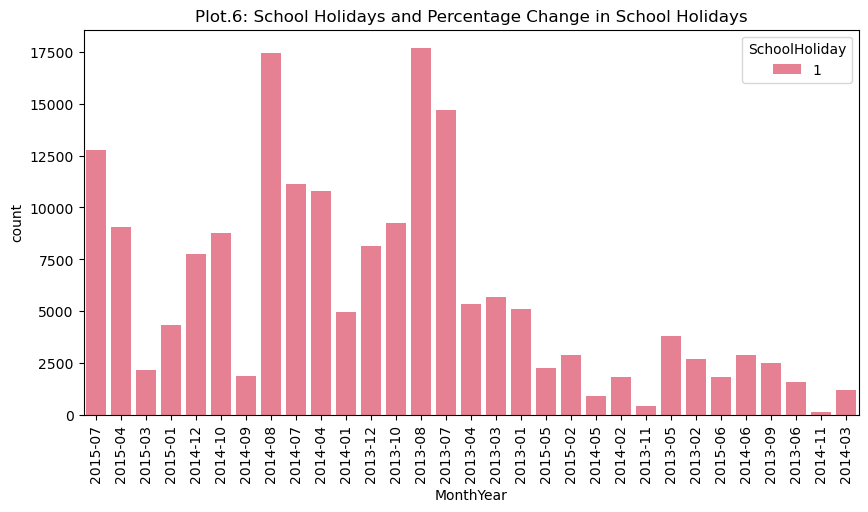

In [16]:
#Count plot over the school holidays available
fig, (axis4) = plt.subplots(1,1, sharex=True, figsize=(10,5))
ax4 = sns.countplot(x='MonthYear', hue='SchoolHoliday', data=df_1[df_1['SchoolHoliday']!=0], palette='husl', ax=axis4)
subs = df_1[df_1['SchoolHoliday']!=0]
tmp = ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
tmp = ax4.set_title('Plot.6: School Holidays and Percentage Change in School Holidays')

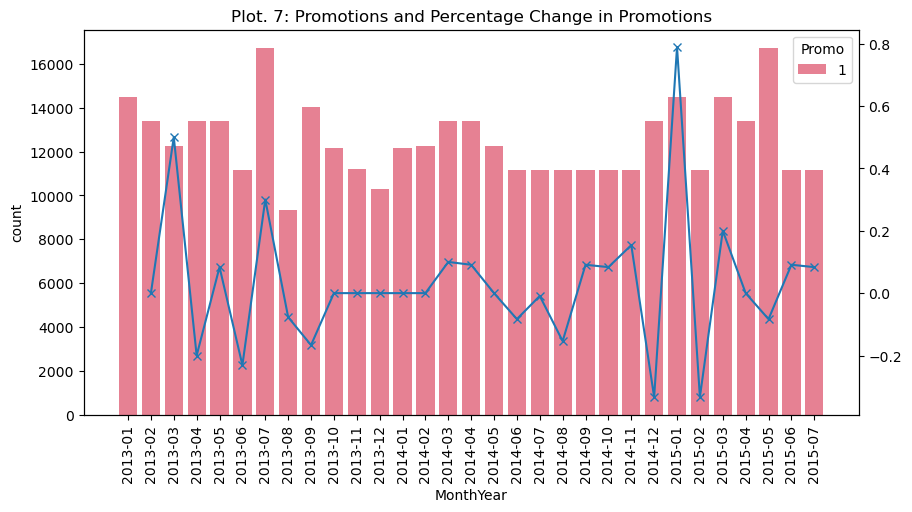

In [17]:
#Count plot over the promo and its percentage change over months
fig, (axis5) = plt.subplots(1,1, sharex=True, figsize=(10,5))
ax5 = sns.countplot(x='MonthYear', hue='Promo', data=df_1[df_1["Promo"]!=0], palette='husl', ax=axis5)
subs = df_1[df_1['Promo']!=0]
cntchange = subs.groupby('MonthYear')['Promo'].count().pct_change()
cntchange.plot(ax=axis5, marker='x', secondary_y=True)
tmp = ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)
tmp = ax5.set_title('Plot. 7: Promotions and Percentage Change in Promotions')

C:\Users\cshas\AppData\Local\Temp\ipykernel_9116\932365010.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = '.3f')


<Axes: >

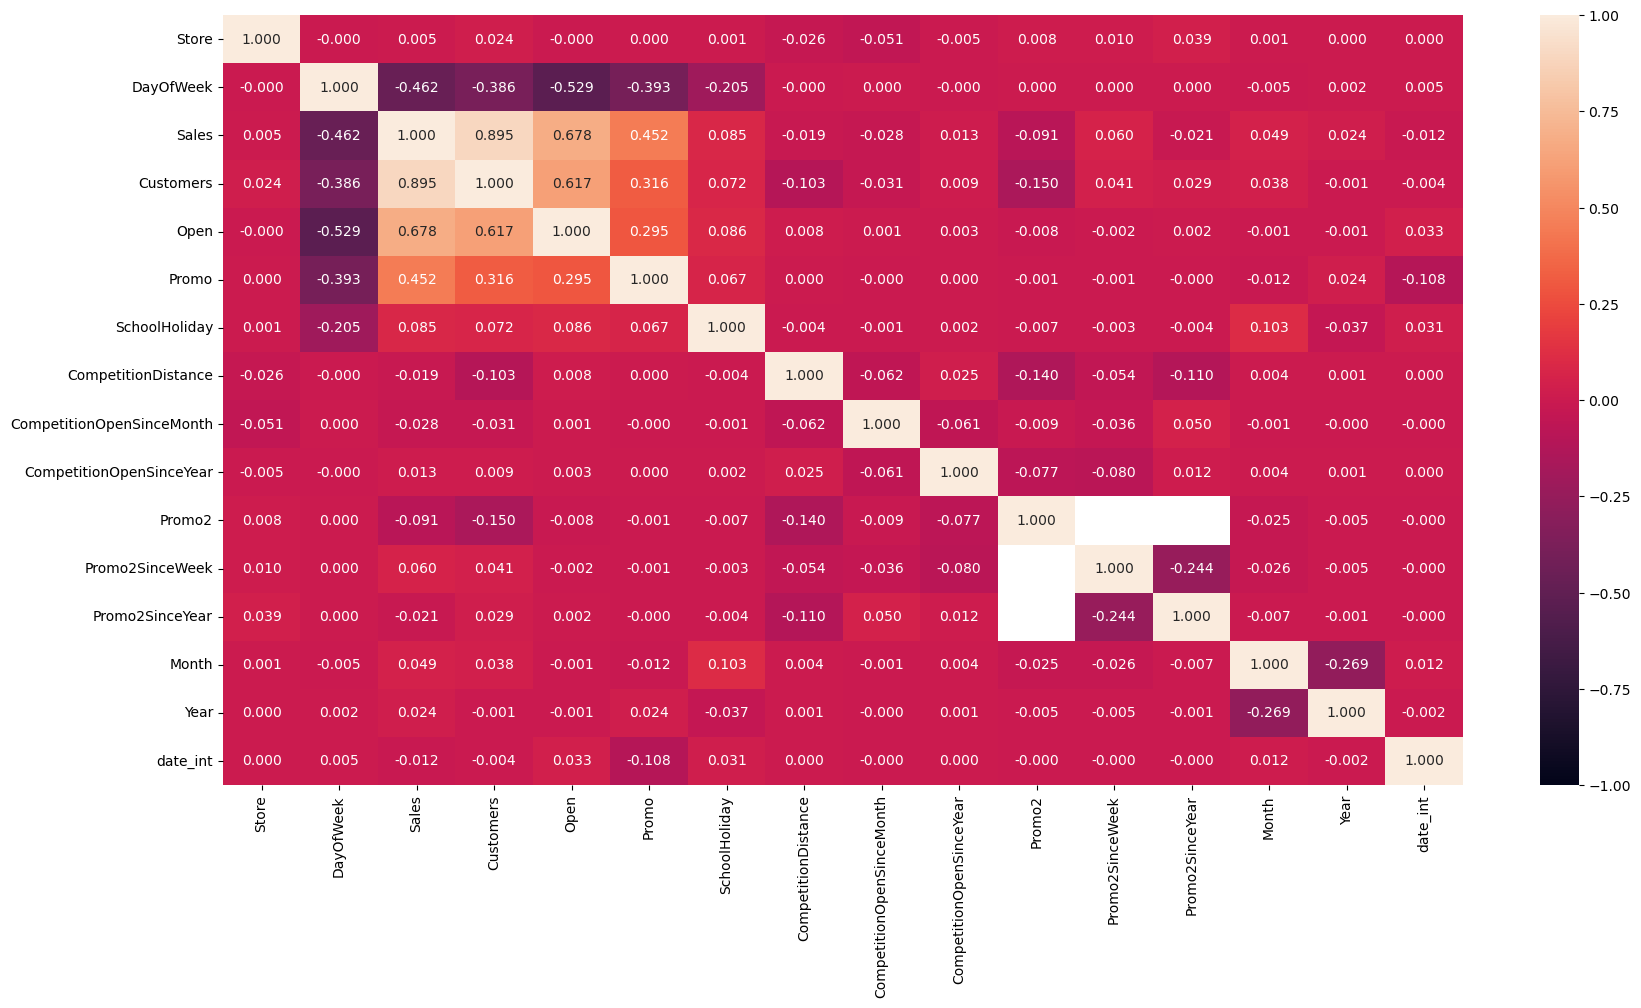

In [18]:
#Data Corr
plt.figure(figsize = (20, 10))

sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = '.3f')

### Time Series Data exploration

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df_1 = df.set_index('Date')
df_1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,MonthYear,date_int
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,7,2015,2015-07,31
2015-07-30,1,4,5020,546,1,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,7,2015,2015-07,30
2015-07-29,1,3,4782,523,1,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,7,2015,2015-07,29
2015-07-28,1,2,5011,560,1,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,7,2015,2015-07,28
2015-07-27,1,1,6102,612,1,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,7,2015,2015-07,27


Testing the individual stores time over the sales to understand any pattern to explore

In [21]:
example_1 = df_1[df_1.Store == 1]['Sales']
example_2 = df_1[df_1.Store == 42]['Sales'].sort_index(ascending = True)
example_3 = df_1[df_1.Store == 6]['Sales']
example_4 = df_1[df_1.Store == 24]['Sales'].sort_index(ascending = True)

<Axes: xlabel='Date'>

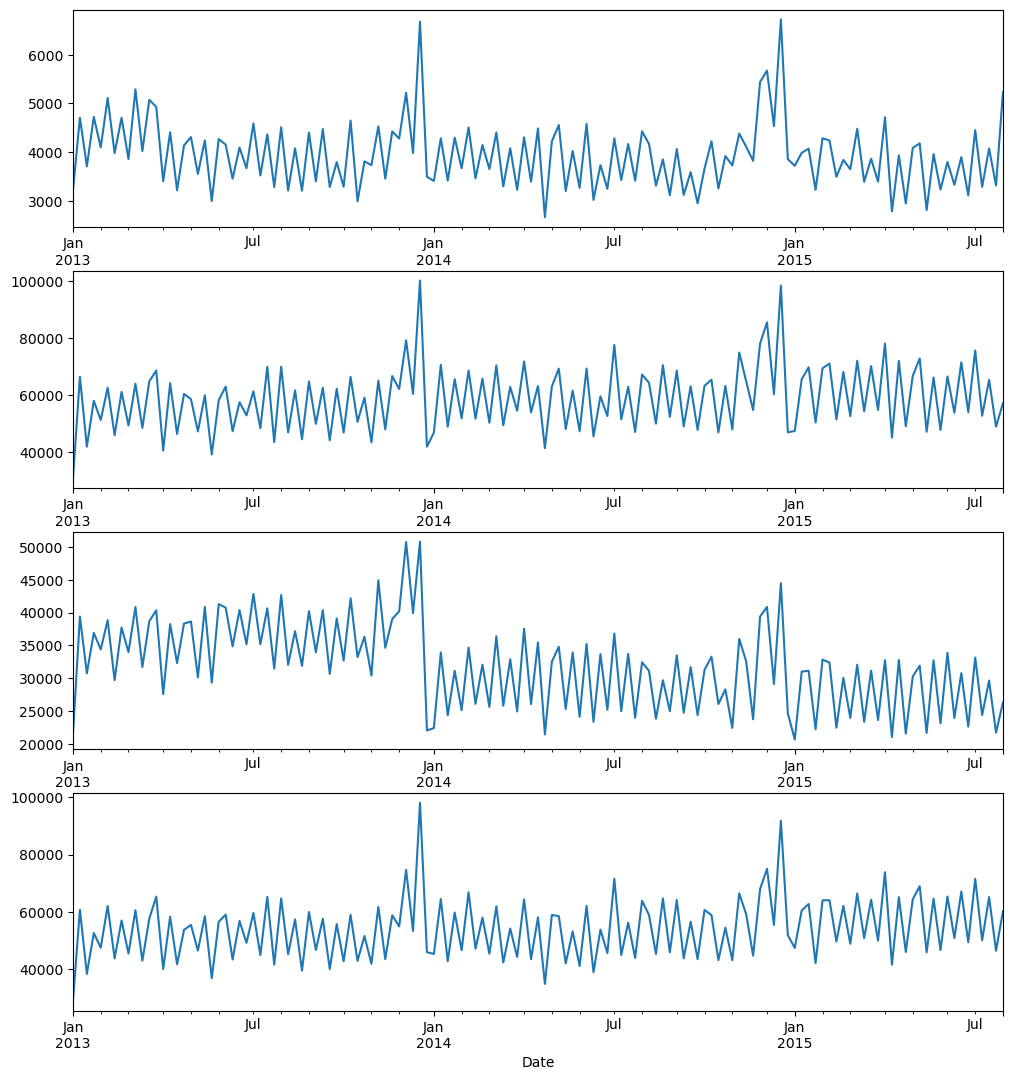

In [22]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
example_1.resample('W').mean().plot(ax = ax1)
example_2.resample('W').sum().plot(ax = ax2)
example_3.resample('W').sum().plot(ax = ax3)
example_4.resample('W').sum().plot(ax = ax4)

Rolling Window Techinique to test the store performance over its rolling mean and standard deviation

In [23]:
rollmean = example_1.rolling(window=7).mean()
rollstd = example_1.rolling(window=7).std()

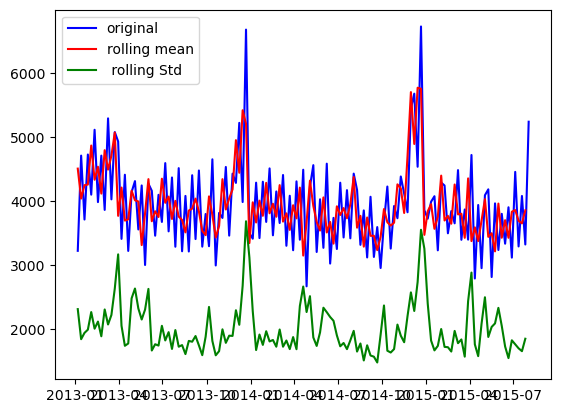

In [24]:
orig = plt.plot(example_1.resample('W').mean(),color='blue',label='original')
roll_mean = plt.plot(rollmean.resample('W').mean(),color='red',label='rolling mean')
orig_std = plt.plot(rollstd.resample('W').mean(),color='green',label=' rolling Std')
plt.legend(loc='best')
plt.show(block=False)